In [ ]:
# data files path: ./data/

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_extractor import *
from cluster_events import *

In [2]:
dataPath = './data/'
outputPath = './results/'

In [7]:
users = pd.read_csv(dataPath + "users.csv")
users.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [8]:
# set max display col
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option('display.max_colwidth')
user_friends = pd.read_csv(dataPath + "user_friends.csv")
user_friends.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [9]:
events = pd.read_csv(dataPath + 'events.csv')
events.head(100)

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9
5,1212611096,1426522332,2012-11-16T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,22
6,3689283674,725266702,2012-11-02T20:00:00.003Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,28
7,2584113432,613687941,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,2,0,0,0,0,0,0,0,0,354
8,3365728297,1098509207,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,47.058,21.926,0,...,0,0,0,0,0,0,0,1,0,25
9,2912638473,3598071768,2012-10-18T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,3


In [10]:
train_data = pd.read_csv(dataPath + 'train.csv')
train_data.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [11]:
# gender and dob
# check for nulls
# users['birthyear'].isna().values.any()
# 'None' in users['birthyear'].unique()
# train_data['gender'].unique()

train_data = add_gender_age(train_data, users)
train_data.head()

,user,event,invited,timestamp,interested,not_interested,user_id,age,gender
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,30,male
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,30,male
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0,3044012,30,male
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,30,male
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,30,male


In [28]:
events.shape

(3137972, 110)

In [ ]:
# Determine optimal k

K = [100, 200, 300, 400, 500]
loss = determine_optimal_k(events.iloc[:, 9:], K)

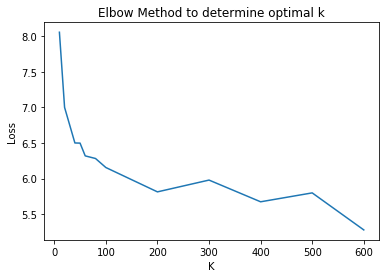

In [14]:
K = [10, 20, 40, 50, 60, 80, 100, 200, 300, 400, 500, 600]
loss = [8.0545744270306, 7.000246119336558, 6.500759436696417, 6.498793292784846, 6.319748048076176, 6.282755542893157,  6.1563728574075745, 5.814683235919998, 5.9800807168807415, 5.675408336909335, 5.800346960036805, 5.280742720821256]
import matplotlib.pyplot as plt
plt.plot(K, loss)
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('Elbow Method to determine optimal k')
# plt.show()
plt.savefig(outputPath + 'elbow.png')

In [ ]:
# Get and save events clusters
k = 50 #50
event_clusters = get_clusters(events, k)
event_clusters.to_csv(dataPath + 'event_clusters_50.csv', na_rep = 'NA', header = True, index = False)

k = 200 #50
event_clusters = get_clusters(events, k)
event_clusters.to_csv(dataPath + 'event_clusters_200.csv', na_rep = 'NA', header = True, index = False)